In [1]:
import os
import pandas

import swasputils

In [2]:
zoo_subjects = pandas.read_csv(
    os.path.join(swasputils.DATA_LOCATION, 'superwasp-variable-stars-subjects.csv'),
)

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
subject_sets = list(set(zoo_subjects[zoo_subjects['workflow_id'] == 7534]['subject_set_id']))

In [4]:
len(zoo_subjects)

1569062

In [5]:
len(zoo_subjects[(zoo_subjects['retired_at'].isna())])

1504497

In [6]:
unretired_subjects = pandas.DataFrame({
    'Subject set': subject_sets,
    'Unretired subjects': [ len(zoo_subjects[ (zoo_subjects['subject_set_id'] == set_id) & (zoo_subjects['retired_at'].isna())]) for set_id in subject_sets ],
})

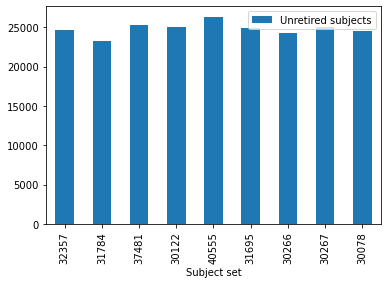

In [7]:
unretired_subjects.plot(x='Subject set', y='Unretired subjects', kind='bar')